#### PCA applied to postions of face


In [648]:
from modules.loaders import LoadDataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [649]:
dataset = LoadDataset('positions_Faces.h5').load_h5()
type(dataset)

h5py._hl.files.File

In [650]:
with dataset as h5file:
    data_h5 = []
    labels = []
    for face in h5file.keys():
        positions = h5file[face]['positions'][:]
        data_h5.append(positions)
        # print(positions.shape)
        labels.extend([face]*positions.shape[1]) #* extend is used to add the elements of the list, not the list itself  

labels = np.array(labels)
labels_letter = np.reshape(labels, (labels.shape[0], ))
labels_letter.shape


(6165,)

In [651]:
for i, id in enumerate(data_h5):
    print('Data shape',i, id.shape)

Data shape 0 (936, 1233)
Data shape 1 (936, 1233)
Data shape 2 (936, 1233)
Data shape 3 (936, 1233)
Data shape 4 (936, 1233)


In [652]:
labels_letter

array(['Enojo', 'Enojo', 'Enojo', ..., 'Triste', 'Triste', 'Triste'],
      dtype='<U8')

In [653]:
data = np.concatenate(data_h5,axis=1)
data.shape

(936, 6165)

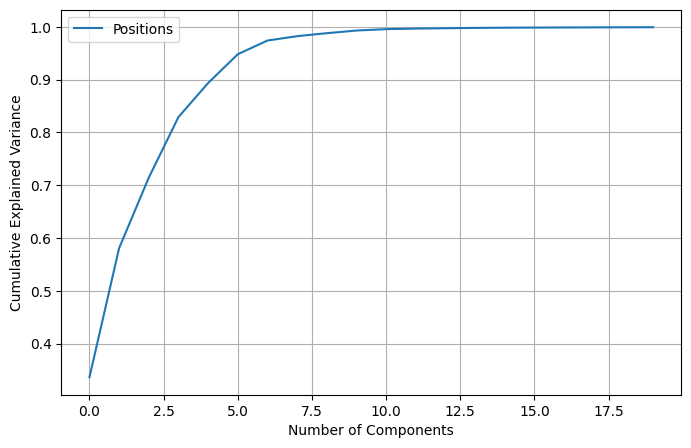

In [654]:
from sklearn.decomposition import PCA

### Reduce dimensions of positions (936)
pca_positions = PCA().fit(data.T) # Fit PCA to data
# print("Explained variance (positions):", pca_positions.explained_variance_ratio_)

# Plot cumulative explained variance (
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_positions.explained_variance_ratio_[0:20]), label='Positions')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid()
plt.show()


In [655]:
pca_positions_sum = np.cumsum(pca_positions.explained_variance_ratio_)


In [656]:
np.where((pca_positions_sum > 0.95) & (pca_positions_sum < 1))

### 

(array([  6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
         19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
         32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
         45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
         58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
        123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
        136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
        149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
        162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
        175, 176, 177, 178, 179, 180, 181, 182, 183

###  If the cumulative explained variance is close to 1.0 from the first few principal components (i.e., a small number of components explain almost all the variance), this indicates that your data has high redundancy or that the positions are highly correlated with each other. This is an interesting scenario and has several implications

In [657]:
from sklearn.decomposition import PCA

# Fit PCA and reduce the dimensionality
pca = PCA(n_components=6)
reduced_data = pca.fit_transform(data.T)

# Recover the original data (or an approximation) using the same PCA object
recovered_data = pca.inverse_transform(reduced_data)

# Print the shape of the reduced and recovered data
print(f"Shape of reduced data: {reduced_data.shape}")
print(f"Shape of recovered data: {recovered_data.shape}")


Shape of reduced data: (6165, 6)
Shape of recovered data: (6165, 936)


In [658]:
valeus = pca.explained_variance_ratio_
valeus

array([0.33630778, 0.2445079 , 0.13363792, 0.11477629, 0.06443568,
       0.05455829])

In [659]:
vectors = pca.components_  # Shape: (3, 936)
#### Let's print the first 3 components
top_features_list = []
n_features = 80 # Number of features to show


for i in range(vectors.shape[0]):  # For each component
    print(f"Componente {i+1}:")
    
    
    top_features = np.argsort(np.abs(vectors[i]))[::-1]  # Sort the features by their absolute value
    #### Minus sign to sort in descending order
    
    # Save the top 10 features
    top_features_list.append(top_features[:n_features].tolist())
    
    for j in top_features[:n_features]:  # Show the top 10 features
        print(f"Feature {j}: {vectors[i, j]}")
    print("\n")

print("Top 10 positions:")
print(top_features_list)

Componente 1:
Feature 8: 0.07530764074305074
Feature 2: 0.07525792156442238
Feature 88: 0.07403184471118672
Feature 548: 0.07390200196376306
Feature 90: 0.0737854774322267
Feature 550: 0.07354388660489944
Feature 38: 0.07219797105087361
Feature 250: 0.07150782970918232
Feature 708: 0.07147670711674854
Feature 474: 0.07077599664985566
Feature 914: 0.07050176104104997
Feature 482: 0.070316047150427
Feature 10: 0.0702993111439797
Feature 922: 0.07026997386799769
Feature 440: 0.06948850539773771
Feature 102: 0.06908998066087875
Feature 880: 0.06902804531210564
Feature 562: 0.0688388483011682
Feature 476: 0.06861343880053687
Feature 916: 0.06852437455116929
Feature 478: 0.06825448969331725
Feature 188: 0.0680982498838554
Feature 918: 0.06797185797157493
Feature 740: 0.06774912624058672
Feature 282: 0.0677294908139964
Feature 484: 0.06692412186007168
Feature 924: 0.06690330908883198
Feature 40: 0.06612264698704859
Feature 500: 0.06610207317432604
Feature 436: 0.06588653924938441
Feature 158:

In [660]:
import itertools
top_features_list = list(itertools.chain(*top_features_list))  # concatenate lists
print(len(top_features_list))

480


In [661]:
top_features_list.sort()  


In [662]:
top_features_list = list(set(top_features_list))  # Delete duplicates
top_features_array = np.array(top_features_list)
top_features_list =   top_features_list +  [ x+1 if x%2 == 0 else x-1 for x in top_features_array]  # Add the previous and next index  
# if -1 or 936 in top_features_list:
#     try:
#         top_features_list.remove(-1)
#         top_features_list.remove(0)
#         top_features_list.remove(1)
#     except:
#         print('There is no zero')
#     try:
#         top_features_list.remove(936)
#         top_features_list.remove(935)
#         top_features_list.remove(934)
#     except:
#         print('There is no 935')
# top_features_list = top_features_list + (np.array(top_features_list) - 1).tolist()  # Add the previous and next index
top_features_list = list(set(top_features_list))  # Delete duplicates
top_features_list.sort()  # Sort the list
top_features_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 38,
 39,
 40,
 41,
 42,
 43,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 68,
 69,
 70,
 71,
 74,
 75,
 76,
 77,
 88,
 89,
 90,
 91,
 92,
 93,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 116,
 117,
 118,
 119,
 120,
 121,
 126,
 127,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 158,
 159,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 186,
 187,
 188,
 189,
 194,
 195,
 198,
 199,
 206,
 207,
 208,
 209,
 210,
 211,
 214,
 215,
 216,
 217,
 218,
 219,
 222,
 223,
 226,
 227,
 230,
 231,
 232,
 233,
 234,
 235,
 246,
 247,
 248,
 249,
 250,
 251,
 254,
 255,
 262,
 263,
 264,
 265,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 286,
 287,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,


In [663]:
print(len(top_features_list))
data_selected = data[ top_features_list,:]
print('Top data most relevant:',data_selected.shape)
print('original data:',data.shape)

464
Top data most relevant: (464, 6165)
original data: (936, 6165)


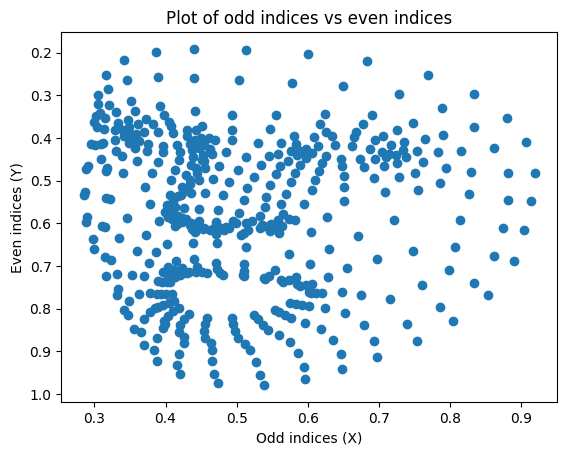

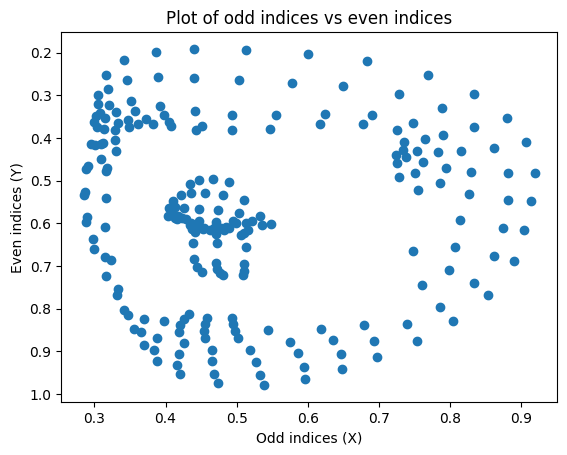

In [664]:
# Plot odd indices in x and even indices in y
face_selected = 0

plt.plot(data.T[face_selected, 0::2], data.T[face_selected,1::2], 'o')  # Odd indices (x) and even indices (y)
plt.gca().invert_yaxis()
# Add labels and title for better clarity
plt.xlabel("Odd indices (X)")
plt.ylabel("Even indices (Y)")
plt.title("Plot of odd indices vs even indices")
plt.show()



# Plot odd indices in x and even indices in y

plt.plot(data_selected.T[face_selected, 0::2], data_selected.T[face_selected, 1::2], 'o')  # Odd indices (x) and even indices (y)
plt.gca().invert_yaxis()
# Add labels and title for better clarity
plt.xlabel("Odd indices (X)")
plt.ylabel("Even indices (Y)")
plt.title("Plot of odd indices vs even indices")
plt.show()

In [665]:

import h5py
s = os.path.sep
do_it = input('Do you want to save the data? (y/n)')
if do_it == 'y':
    output_file = f'..{os.path.sep}..{os.path.sep}data{os.path.sep}features{os.path.sep}positions_Faces_PCA.h5'

    # Create an HDF5 file and group data by labels
    with h5py.File(output_file, "w") as h5file:
        # Iterate over the labels and the data
        for i, label in enumerate(np.unique(labels_letter)):
            # Filter the positions corresponding to the current label
            group_data = reduced_data[labels_letter == label]
            
            # Transpose the group_data before saving
            data_selected = data[ top_features_list,1233*i:1233*(i+1)]  # Select the most relevant features
            
            # Create a group with the name of the label
            grp = h5file.create_group(str(label))
            print(label)
            # Create a dataset inside the group for the transposed positions
            grp.create_dataset('positions', data=data_selected)
        print(f"Data successfully saved to {output_file}")
        
        
    df = pd.DataFrame(top_features_list, columns=["Selected_Features"])

# Guardar el DataFrame en un archivo CSV
    df.to_csv(f'..{s}..{s}data{s}features{s}selected_index_faces.csv', index=False)
else:
    print('Data not saved')



Enojo
Feliz
Neutral
Sorpresa
Triste
Data successfully saved to ..\..\data\features\positions_Faces_PCA.h5


In [679]:
top_features = pd.read_csv('..\\..\\data\\features\\selected_index_faces.csv' )
top_features['Selected_Features'].to_list() 

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 38,
 39,
 40,
 41,
 42,
 43,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 68,
 69,
 70,
 71,
 74,
 75,
 76,
 77,
 88,
 89,
 90,
 91,
 92,
 93,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 116,
 117,
 118,
 119,
 120,
 121,
 126,
 127,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 158,
 159,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 186,
 187,
 188,
 189,
 194,
 195,
 198,
 199,
 206,
 207,
 208,
 209,
 210,
 211,
 214,
 215,
 216,
 217,
 218,
 219,
 222,
 223,
 226,
 227,
 230,
 231,
 232,
 233,
 234,
 235,
 246,
 247,
 248,
 249,
 250,
 251,
 254,
 255,
 262,
 263,
 264,
 265,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 286,
 287,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
